In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind

import features

In [180]:
plt.style.use("../matplotlib.mplstyle")
csv = pd.read_csv("AvgResponses.csv", index_col=0)

In [181]:
csv = features.Differences(csv)
csv.columns

Index(['imp', 'alg', 'opt', 'teosVolume', 'teosVolPct', 'tsfw2', 'lsfw3',
       'tsfw1', 'lsfw2', 'tspk2', 'lspk2', 'tspk1', 'lspk1', 'lsfw1', 'lspk3',
       'tsfw3', 'tspk3', 'lp21', 'lp31', 'lp32', 'tp21', 'tp31', 'tp32',
       'lw21', 'lw31', 'lw32', 'tw21', 'tw31', 'tw32', 'dp11', 'dp22', 'dp33',
       'dp21', 'dp31', 'dp32', 'dw11', 'dw22', 'dw33', 'dw21', 'dw31', 'dw32'],
      dtype='object')

# Boxplots by Property

In [177]:
def boxplot_optimum(cols, csv, ax=None):
    if isinstance(cols, str):
        cols = csv.columns[csv.columns.str.contains(cols)].sort_values()
    n = len(cols)
    
    if n == 0:
        print("No columns found!!")
        return None
    
    fsize = (max(1*n, 3.25), 2)

    if ax is None:
        fig, ax = plt.subplots(1, 1, dpi=100, figsize=(1*n, 2))
        fsave = "feats_optimum_%s.png" %cols

    lbls = ['full', 'lobe']
    colors = ["#3070dd", "#e93030"]

    width = 0.33
    sep = 0.2

    for i in range(1, n+1):
        col = cols[i-1]
        vals = [ csv.loc[csv.opt == a, col] for a in lbls ]
        box = ax.boxplot(vals, sym='.', widths=width, positions=[i-sep, i+sep], patch_artist=True)

        for patch, color in zip(box['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_edgecolor('k')
            patch.set_alpha(0.9)

        ax.set_xticks(range(1, n+1), cols, rotation=0)
        ax.set(ylabel = "Optimum value (nm)")

    if ax is None:
        ax.legend([box["boxes"][0], box["boxes"][1]], lbls, loc=(0.1, 1.01), ncol=2)
        plt.tight_layout()
        plt.savefig(fsave)
        print("Saved", fsize, "inches:", fsave)
        plt.show()
    else:
        return box['boxes']

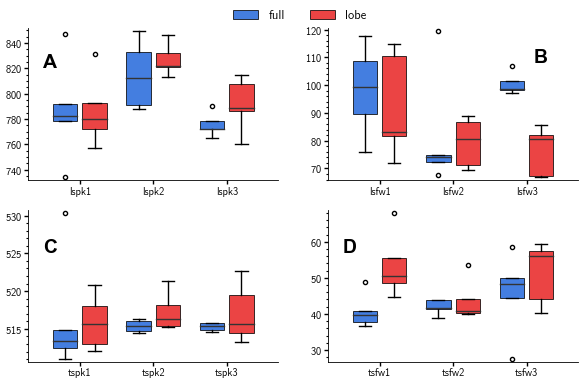

In [229]:
plt.rcParams['xtick.minor.visible'] = False
plt.rcParams['ytick.minor.visible'] = True

fig, ax = plt.subplots(2, 2, dpi=100, figsize=(6, 4))
boxes = boxplot_optimum('lspk', csv, ax[0, 0])
boxplot_optimum('lsfw', csv, ax[0, 1])
boxplot_optimum('tspk', csv, ax[1, 0])
boxplot_optimum('tsfw', csv, ax[1, 1])

ax[0, 0].legend([boxes[0], boxes[1]], lbls, loc=(0.8, 1.01), ncol=2)

ax[0, 0].annotate("A", xy=(0.5, 820), fontweight='bold', fontsize=14, fontfamily='Arial')
ax[0, 1].annotate("B", xy=(3.1, 108), fontweight='bold', fontsize=14, fontfamily='Arial')
ax[1, 0].annotate("C", xy=(0.5, 525), fontweight='bold', fontsize=14, fontfamily='Arial')
ax[1, 1].annotate("D", xy=(0.5, 57), fontweight='bold', fontsize=14, fontfamily='Arial')

plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
plt.savefig("../../Plots/optimized_original_feats.png")
plt.show()

# Difference boxplots

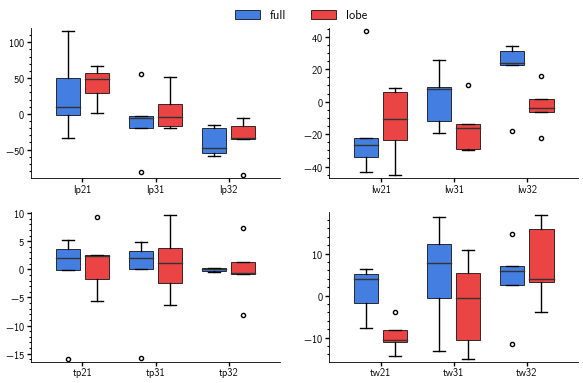

In [228]:
fig, ax = plt.subplots(2, 2, dpi=100, figsize=(6, 4))
boxes = boxplot_optimum('lp', csv, ax[0, 0])
boxplot_optimum('lw', csv, ax[0, 1])
boxplot_optimum('tp', csv, ax[1, 0])
boxplot_optimum('tw', csv, ax[1, 1])

ax[0, 0].legend([boxes[0], boxes[1]], lbls, loc=(0.8, 1.01), ncol=2)

plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
# plt.savefig(fsave)
plt.show()

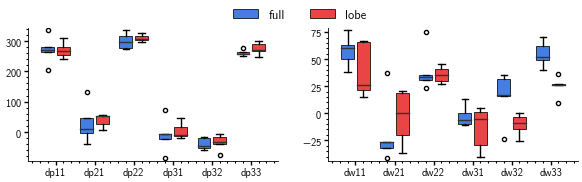

In [217]:
fig, ax = plt.subplots(1, 2, dpi=100, figsize=(6, 2))
boxes = boxplot_optimum('dp', csv, ax[0])
boxplot_optimum('dw', csv, ax[1])

ax[0].legend([boxes[0], boxes[1]], lbls, loc=(0.8, 1.01), ncol=2)

plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
# plt.savefig(fsave)
plt.show()

## Distinguishable Features

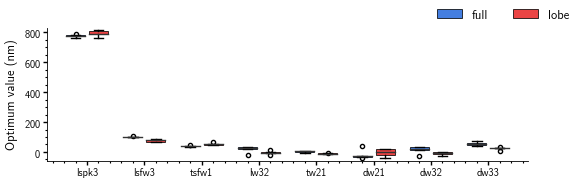

In [187]:
feats = ['lspk3', 'lsfw3', 'tsfw1', 'lw32', 'tw21', 'dw21', 'dw32', 'dw33']

fig, ax = plt.subplots(1, 1, dpi=100, figsize=(6, 2))
boxes = boxplot_optimum(feats, csv, ax)
ax.legend([boxes[0], boxes[1]], lbls, loc=(0.8, 1.01), ncol=2)

plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
# plt.savefig(fsave)
plt.show()

In [272]:
def boxplot_optimum(cols, csv, ax=None):
    if isinstance(cols, str):
        cols = csv.columns[csv.columns.str.contains(cols)].sort_values()
    n = len(cols)
    
    if n == 0:
        print("No columns found!!")
        return None
    
    fsize = (max(1*n, 3.25), 2)

    if ax is None:
        fig, ax = plt.subplots(1, 1, dpi=100, figsize=(1*n, 2))
        fsave = "feats_optimum_%s.png" %cols

    lbls = ['full', 'lobe']
    colors = ["#3070dd", "#e93030"]

    width = 0.33
    sep = 0.2

    for i in range(1, n+1):
        col = cols[i-1]
        vals = [ csv.loc[csv.opt == a, col] for a in lbls ]
        pvalue = ttest_ind(vals[0], vals[1], equal_var=False).pvalue
        
        box = ax.boxplot(vals, sym='.', widths=width, positions=[i-sep, i+sep], patch_artist=True)

        for patch, color in zip(box['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_edgecolor('k')
            patch.set_alpha(0.9)
            
        # statistical annotation
        x1, x2 = i-sep, i+sep
        y, h, col = max(vals[0].max(), vals[1].max()) + 5, 2, 'k'
        if pvalue < 0.01:
            ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.8, c=col)
            ax.text((x1+x2)*.5, y, "***", ha='center', va='bottom', color=col)
        elif pvalue < 0.05:
            ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.8, c=col)
            ax.text((x1+x2)*.5, y, "**", ha='center', va='bottom', color=col)
        elif pvalue < 0.1:
            ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.8, c=col)
            ax.text((x1+x2)*.5, y, "*", ha='center', va='bottom', color=col)

        ax.set_xticks(range(1, n+1), cols, rotation=0)

    if ax is None:
        ax.legend([box["boxes"][0], box["boxes"][1]], lbls, loc=(0.1, 1.01), ncol=2)
        plt.tight_layout()
        plt.savefig(fsave)
        print("Saved", fsize, "inches:", fsave)
        plt.show()
    else:
        return box['boxes']

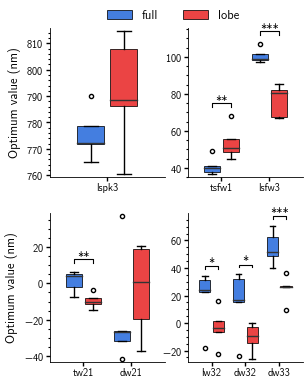

In [273]:
plt.rcParams['xtick.minor.visible'] = False
plt.rcParams['ytick.minor.visible'] = True

fig, ax = plt.subplots(2, 2, dpi=100, figsize=(3.25, 4))
boxes = boxplot_optimum(['lspk3'], csv, ax[0, 0])
boxplot_optimum(['tsfw1', 'lsfw3'], csv, ax[0, 1])
boxplot_optimum(['tw21', 'dw21'], csv, ax[1, 0])
boxplot_optimum(['lw32', 'dw32', 'dw33'], csv, ax[1, 1])

ax[0, 0].legend([boxes[0], boxes[1]], lbls, loc=(0.45, 1.01), ncol=2)

ax[0, 0].set(ylabel = "Optimum value (nm)")
ax[1, 0].set(ylabel = "Optimum value (nm)")

plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
plt.savefig("../../Plots/optimized_distinguishable_feats.png")
plt.show()

In [271]:
cols = csv.columns.drop(['imp', 'alg', 'opt'])
lbls = ['full', 'lobe']

d = []
p = []

for col in cols:
    vals = [ csv.loc[csv.opt == a, col] for a in lbls ]
    res = ttest_ind(vals[0], vals[1], equal_var=False)
    d.append(res.statistic)
    p.append(res.pvalue)
    
df = pd.DataFrame({'difference': d, 'pValue': p}, index = cols).sort_values('pValue')
df

,difference,pValue
lsfw3,5.605117,0.001804
dw33,4.309386,0.002821
tw21,3.447696,0.010759
tsfw1,-2.774910,0.031549
dw32,2.236823,0.070711
lw32,1.932898,0.095270
lw31,1.680982,0.131607
tspk2,-1.620852,0.168182
lspk3,-1.534247,0.180160
dw11,1.435131,0.198380


In [ ]:
csv.columns

Index(['imp', 'alg', 'opt', 'teosVolume', 'teosVolPct', 'tsfw2', 'lsfw3',
       'tsfw1', 'lsfw2', 'tspk2', 'lspk2', 'tspk1', 'lspk1', 'lsfw1', 'lspk3',
       'tsfw3', 'tspk3', 'lp21', 'lp31', 'lp32', 'tp21', 'tp31', 'tp32',
       'lw21', 'lw31', 'lw32', 'tw21', 'tw31', 'tw32', 'dp11', 'dp22', 'dp33',
       'dp21', 'dp31', 'dp32', 'dw11', 'dw22', 'dw33', 'dw21', 'dw31', 'dw32'],
      dtype='object')

In [267]:
ttest_ind?

Signature:
ttest_ind(
    a,
    b,
    axis=0,
    equal_var=True,
    nan_policy='propagate',
    permutations=None,
    random_state=None,
    alternative='two-sided',
    trim=0,
)
Docstring:
Calculate the T-test for the means of *two independent* samples of scores.

This is a test for the null hypothesis that 2 independent samples
have identical average (expected) values. This test assumes that the
populations have identical variances by default.

Parameters
----------
a, b : array_like
    The arrays must have the same shape, except in the dimension
    corresponding to `axis` (the first, by default).
axis : int or None, optional
    Axis along which to compute test. If None, compute over the whole
    arrays, `a`, and `b`.
equal_var : bool, optional
    If True (default), perform a standard independent 2 sample test
    that assumes equal population variances [1]_.
    If False, perform Welch's t-test, which does not assume equal
    population variance [2]_.

    .. versionadde